### Historical California Wildfire Data

CAL FIRE maintains historical data about wildfires in California, available for download.  This includes both detailed GIS (Geographic Information System) files describing the geography of individual fires, as well as an Excel spreadsheet with summary statistics of many fires.  We will be working with this summary spreadsheet, which you can download from this link: http://frap.fire.ca.gov/data/statewide/Fires_100.xlsx .

![](CALFire.jpg)

### Dealing with data

While this dataset from CAL FIRE is extremely useful, it is often the case the data you acquire will need to be cleaned up some in order for you to begin working with it.  (This is the less glamorous side of the field of data science.)  Here you will learn some useful tools within pandas for cleaning up data of this sort.

First, let's import some modules that will be useful for analyzing and plotting data.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

Previously you used a pandas function to read tabular data from a csv file into a DataFrame.

You can use a similar function to read tabular data stored in an Excel spreadsheet.
- Tabular data in an Excel spreadsheet is of the same form, just in a different format.
- If a spreadsheet file contains more than one sheet, you usually will want to specify which sheet name to read.

In [19]:
df = pd.read_excel('Fires_100.xlsx', sheet_name='2016')

Let's have a look at the data. Each row specifies a particular fire.  Some of the more important columns are the YEAR, as well as
- ALARM_DATE (when fire was first identified),
- CONT_DATE (when the fire was considered contained),
- GIS_ACRES (number of acres burned, as determined through the use of GIS tools).

In [20]:
df.head()

,YEAR,STATE,AGENCY,UNIT_ID,FIRE_NAME,INC_NUM,ALARM_DATE,CONT_DATE,CAUSE,COMMENTS,REPORT_AC,GIS_ACRES,C_METHOD,OBJECTIVE
0,1878,California,Contract County,Los Angeles County,,0,<Null>,<Null>,14 - Unknown / Unidentified,NaN,<Null>,59468.8800,<Null>,Suppression (Wildfire)
1,1895,California,Contract County,Los Angeles County,,0,<Null>,<Null>,14 - Unknown / Unidentified,NaN,<Null>,628.1136,<Null>,Suppression (Wildfire)
2,1896,California,Contract County,Los Angeles County,,0,<Null>,<Null>,14 - Unknown / Unidentified,NaN,<Null>,7531.7170,<Null>,Suppression (Wildfire)
3,1898,California,Contract County,Los Angeles County,,0,<Null>,<Null>,14 - Unknown / Unidentified,NaN,<Null>,1660.1030,<Null>,Suppression (Wildfire)
4,1898,California,Contract County,Los Angeles County,,0,<Null>,<Null>,14 - Unknown / Unidentified,NaN,<Null>,428.4387,<Null>,Suppression (Wildfire)


### What's in the DataFrame?

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11795 entries, 0 to 11794
Data columns (total 14 columns):
YEAR          11789 non-null object
STATE         11795 non-null object
AGENCY        11795 non-null object
UNIT_ID       11794 non-null object
FIRE_NAME     11769 non-null object
INC_NUM       11720 non-null object
ALARM_DATE    11795 non-null object
CONT_DATE     11795 non-null object
CAUSE         11795 non-null object
COMMENTS      1961 non-null object
REPORT_AC     11795 non-null object
GIS_ACRES     11795 non-null float64
C_METHOD      11795 non-null object
OBJECTIVE     11795 non-null object
dtypes: float64(1), object(13)
memory usage: 1.3+ MB


### Oddities 

Something looks a little funny here.  Look at some of the entries near the top of the DataFrame, and compare that with the summary information provided by <code>info()</code>.

There is a disconnect -- what is it?

One problem is that there are cell values which are supposed to be empty or missing (encoded as `<Null>`), but `info()` wants to count them as non-null.

Pandas can handle missing data, but it turns out that `<Null>` is a non-standard representation for missing data. So Pandas interprets it as the character string "`<Null>`".

Fortunately, the <code>pd.read_excel()</code> function has an option for specifying additional missing values.

### Assignment #1

Type <code>pd.read_excel?</code> to inspect the documentation for this function, and identify the optional argument we need to use.  

Add an additional argument to the call to  <code>pd.read_excel()</code> in order to have `<Null>` interpreted as missing/empty.

In [23]:
pd.read_excel?


In [24]:
#My Solution
pd.read_excel('Fires_100.xlsx', sheet_name='2016', na_values=['<Null>'])

,YEAR,STATE,AGENCY,UNIT_ID,FIRE_NAME,INC_NUM,ALARM_DATE,CONT_DATE,CAUSE,COMMENTS,REPORT_AC,GIS_ACRES,C_METHOD,OBJECTIVE
0,1878.0,California,Contract County,Los Angeles County,,0,NaN,NaT,14 - Unknown / Unidentified,NaN,NaN,59468.8800,NaN,Suppression (Wildfire)
1,1895.0,California,Contract County,Los Angeles County,,0,NaN,NaT,14 - Unknown / Unidentified,NaN,NaN,628.1136,NaN,Suppression (Wildfire)
2,1896.0,California,Contract County,Los Angeles County,,0,NaN,NaT,14 - Unknown / Unidentified,NaN,NaN,7531.7170,NaN,Suppression (Wildfire)
3,1898.0,California,Contract County,Los Angeles County,,0,NaN,NaT,14 - Unknown / Unidentified,NaN,NaN,1660.1030,NaN,Suppression (Wildfire)
4,1898.0,California,Contract County,Los Angeles County,,0,NaN,NaT,14 - Unknown / Unidentified,NaN,NaN,428.4387,NaN,Suppression (Wildfire)
5,1898.0,California,Contract County,Ventura County,LOS PADRES,0,9/1/1898,NaT,14 - Unknown / Unidentified,NaN,NaN,20539.9500,NaN,Suppression (Wildfire)
6,1898.0,California,Contract County,Ventura County,MATILIJA,0,4/1/1898,NaT,14 - Unknown / Unidentified,NaN,NaN,2641.1230,NaN,Suppression (Wildfire)
7,1898.0,California,Contract County,Ventura County,COZY DELL,0,9/1/1898,NaT,14 - Unknown / Unidentified,NaN,NaN,2974.5850,NaN,Suppression (Wildfire)
8,1900.0,California,California Department of Forestry and Fire Pro...,Riverside CAL FIRE,,0,NaN,NaT,14 - Unknown / Unidentified,NaN,NaN,978.7541,NaN,Suppression (Wildfire)
9,1900.0,California,Contract County,Los Angeles County,BIG FIRE,0,NaN,NaT,14 - Unknown / Unidentified,NaN,NaN,2521.0640,NaN,Suppression (Wildfire)


### Solution #1 (NaN = not a number)

In [28]:
df = pd.read_excel('Fires_100.xlsx', sheet_name='2016', na_values=['<Null>'])

### Re-examining the DataFrame

In [29]:
df.head()

,YEAR,STATE,AGENCY,UNIT_ID,FIRE_NAME,INC_NUM,ALARM_DATE,CONT_DATE,CAUSE,COMMENTS,REPORT_AC,GIS_ACRES,C_METHOD,OBJECTIVE
0,1878.0,California,Contract County,Los Angeles County,,0,NaN,NaT,14 - Unknown / Unidentified,NaN,NaN,59468.8800,NaN,Suppression (Wildfire)
1,1895.0,California,Contract County,Los Angeles County,,0,NaN,NaT,14 - Unknown / Unidentified,NaN,NaN,628.1136,NaN,Suppression (Wildfire)
2,1896.0,California,Contract County,Los Angeles County,,0,NaN,NaT,14 - Unknown / Unidentified,NaN,NaN,7531.7170,NaN,Suppression (Wildfire)
3,1898.0,California,Contract County,Los Angeles County,,0,NaN,NaT,14 - Unknown / Unidentified,NaN,NaN,1660.1030,NaN,Suppression (Wildfire)
4,1898.0,California,Contract County,Los Angeles County,,0,NaN,NaT,14 - Unknown / Unidentified,NaN,NaN,428.4387,NaN,Suppression (Wildfire)


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11795 entries, 0 to 11794
Data columns (total 14 columns):
YEAR          11733 non-null float64
STATE         11795 non-null object
AGENCY        11795 non-null object
UNIT_ID       11792 non-null object
FIRE_NAME     11767 non-null object
INC_NUM       11319 non-null object
ALARM_DATE    7810 non-null object
CONT_DATE     2974 non-null datetime64[ns]
CAUSE         11784 non-null object
COMMENTS      1729 non-null object
REPORT_AC     3506 non-null float64
GIS_ACRES     11795 non-null float64
C_METHOD      3352 non-null object
OBJECTIVE     11739 non-null object
dtypes: datetime64[ns](1), float64(3), object(10)
memory usage: 1.3+ MB


### Continuing to refine the datatypes

For reasons that are not entirely obvious, the ALARM_DATE is interpreted as an "object" (read: string), and CONT_DATE is interpreted as a date (datetype64).  It would be good if they were both interpreted as dates so that we could operate on them.

If we revisit the documentation for <code>pd.excel</code>, we see that there is an option to specify what converter function to use for particular datatypes.  The pandas datetime converter <code>pd.to_datetime</code> is just what we want:

In [32]:
df = pd.read_excel('Fires_100.xlsx', sheet_name='2016', na_values=['<Null>'], 
                   converters= {'ALARM_DATE': pd.to_datetime, 'CONT_DATE': pd.to_datetime})

# add date recognition and convert data under 'ALARM_DATE' and 'CONT_DATE' to date type

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11795 entries, 0 to 11794
Data columns (total 14 columns):
YEAR          11733 non-null float64
STATE         11795 non-null object
AGENCY        11795 non-null object
UNIT_ID       11792 non-null object
FIRE_NAME     11767 non-null object
INC_NUM       11319 non-null object
ALARM_DATE    7810 non-null datetime64[ns]
CONT_DATE     2974 non-null datetime64[ns]
CAUSE         11784 non-null object
COMMENTS      1729 non-null object
REPORT_AC     3506 non-null float64
GIS_ACRES     11795 non-null float64
C_METHOD      3352 non-null object
OBJECTIVE     11739 non-null object
dtypes: datetime64[ns](2), float64(3), object(9)
memory usage: 1.3+ MB


Now that the ALARM_DATE and CONT_DATE are both interpreted as datetime objects, we can use them to compute a new quantity not contained in the original dataset: fire duration, i.e., the time between when the fire was first identified and when it was contained.

Within Pandas, we can add a new column to the dataset: `df['DURATION']`

### Assignment #2

Add a new column called DURATION which is the difference between the CONT_DATE and the ALARM_DATE.

Hint: Because CONT_DATE and ALARM_DATE are now both <code>datetime</code> objects, you can subtract one from the other.  The resulting object is of type <code>timedelta</code>.  Let's extract the number of days associated with that time difference: the attribute <code>dt.days</code> of a <code>timedelta</code> object provides that information.

In [46]:
#My solution
#create DURATION column
df['DURATION'] = (df['CONT_DATE'] - df['ALARM_DATE']).dt.days
df.info()
df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11795 entries, 0 to 11794
Data columns (total 15 columns):
YEAR          11733 non-null float64
STATE         11795 non-null object
AGENCY        11795 non-null object
UNIT_ID       11792 non-null object
FIRE_NAME     11767 non-null object
INC_NUM       11319 non-null object
ALARM_DATE    7810 non-null datetime64[ns]
CONT_DATE     2974 non-null datetime64[ns]
CAUSE         11784 non-null object
COMMENTS      1729 non-null object
REPORT_AC     3506 non-null float64
GIS_ACRES     11795 non-null float64
C_METHOD      3352 non-null object
OBJECTIVE     11739 non-null object
DURATION      2968 non-null float64
dtypes: datetime64[ns](2), float64(4), object(9)
memory usage: 1.3+ MB


,YEAR,STATE,AGENCY,UNIT_ID,FIRE_NAME,INC_NUM,ALARM_DATE,CONT_DATE,CAUSE,COMMENTS,REPORT_AC,GIS_ACRES,C_METHOD,OBJECTIVE,DURATION
0,1878.0,California,Contract County,Los Angeles County,,0,NaT,NaT,14 - Unknown / Unidentified,NaN,NaN,59468.8800,NaN,Suppression (Wildfire),NaN
1,1895.0,California,Contract County,Los Angeles County,,0,NaT,NaT,14 - Unknown / Unidentified,NaN,NaN,628.1136,NaN,Suppression (Wildfire),NaN
2,1896.0,California,Contract County,Los Angeles County,,0,NaT,NaT,14 - Unknown / Unidentified,NaN,NaN,7531.7170,NaN,Suppression (Wildfire),NaN
3,1898.0,California,Contract County,Los Angeles County,,0,NaT,NaT,14 - Unknown / Unidentified,NaN,NaN,1660.1030,NaN,Suppression (Wildfire),NaN
4,1898.0,California,Contract County,Los Angeles County,,0,NaT,NaT,14 - Unknown / Unidentified,NaN,NaN,428.4387,NaN,Suppression (Wildfire),NaN


### Solution #2

In [47]:
df['DURATION'] = (df['CONT_DATE'] - df['ALARM_DATE']).dt.days


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11795 entries, 0 to 11794
Data columns (total 15 columns):
YEAR          11733 non-null float64
STATE         11795 non-null object
AGENCY        11795 non-null object
UNIT_ID       11792 non-null object
FIRE_NAME     11767 non-null object
INC_NUM       11319 non-null object
ALARM_DATE    7810 non-null datetime64[ns]
CONT_DATE     2974 non-null datetime64[ns]
CAUSE         11784 non-null object
COMMENTS      1729 non-null object
REPORT_AC     3506 non-null float64
GIS_ACRES     11795 non-null float64
C_METHOD      3352 non-null object
OBJECTIVE     11739 non-null object
DURATION      2968 non-null float64
dtypes: datetime64[ns](2), float64(4), object(9)
memory usage: 1.3+ MB


### Relationship between fire size and duration

Now that we have computed the time duration for 2968 wildfires, let's see how those durations are related to the sizes (GIS_ACRES). 

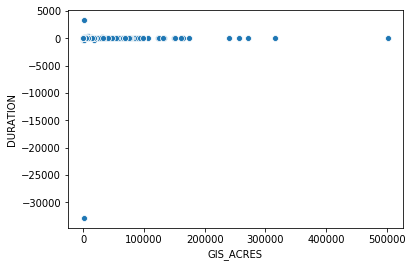

In [48]:
sns.scatterplot(df.GIS_ACRES, df.DURATION)

That's weird.  Even though the CONT_DATE presumably should occur <i>after</i> the ALARM_DATE, some of the fire durations are negative.  We can examine them by filtering the dataframe:

In [49]:
df[df.DURATION<0]
#print all negative duration
#like last row alrm date = 2106 

,YEAR,STATE,AGENCY,UNIT_ID,FIRE_NAME,INC_NUM,ALARM_DATE,CONT_DATE,CAUSE,COMMENTS,REPORT_AC,GIS_ACRES,C_METHOD,OBJECTIVE,DURATION
6728,1978.0,California,USDA Forest Service,Stanislaus National Forest,KIBBIE,NaN,1979-08-08,1978-11-10,1 - Lightning,20090305,192.000000,227.8784,6 - Hand Drawn,Suppression (Wildfire),-271.0
8159,1987.0,California,National Park Service,Sequoia - Kings Canyon NP,COFFEE,0,1987-09-29,1987-09-10,1 - Lightning,NaN,240.000000,196.1928,8 - Unknown,Suppression (Wildfire),-19.0
9138,1996.0,California,California Department of Forestry and Fire Pro...,Nevada - Yuba - Placer CAL FIRE,COLUMBIA HILL,0,1996-10-21,1996-10-20,5 - Debris,NaN,NaN,1517.4430,NaN,Suppression (Wildfire),-1.0
10375,2005.0,California,Contract County,Los Angeles County,SIERRA,149034,2005-07-13,2005-04-14,8 - Playing with fire,NaN,364.000000,364.3786,8 - Unknown,Suppression (Wildfire),-90.0
10618,2007.0,California,Bureau of Land Management,Bakersfield District - BLM (old),BROWN,1504,2007-07-20,2007-06-23,9 - Miscellaneous,,84.700000,1430.3170,1 - GPS Ground,Suppression (Wildfire),-27.0
11511,2014.0,California,National Park Service,Yosemite National Park,DARK HOLE,57,2015-07-16,2014-09-27,1 - Lightning,Managed Lightning Ignited,1076.479248,1076.4790,1 - GPS Ground,NaN,-292.0
11559,2015.0,California,USDA Forest Service,Humbolt-Toiyabe National Forest,WASHINGTON,30251,2015-07-19,2015-01-01,1 - Lightning,,NaN,17779.5400,3 - Infrared,Suppression (Wildfire),-199.0
11639,2016.0,California,California Department of Forestry and Fire Pro...,Tuolumne - Calaveras CAL FIRE,MARSHES,10403,2106-09-26,2016-10-05,10 - Vehicle,NaN,1080.000000,930.5065,3 - Infrared,Suppression (Wildfire),-32862.0


### Assignment #3

### Filtering the dataframe

Presumably we could try to figure out what is wrong with those few entries, but why don't we just toss them out for now.

Create a revised version of the DataFrame to include only those with non-negative DURATION, and redo the scatterplot of DURATION vs. GIS_ACRES.

### Solution #3

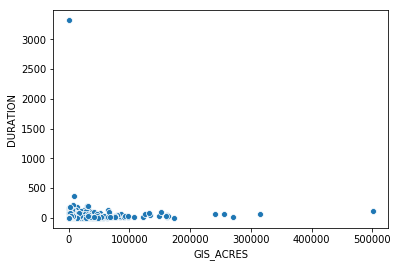

In [14]:
# filter to only positive duration
df = df[df.DURATION >= 0]
sns.scatterplot(df.GIS_ACRES, df.DURATION)

# now we see another error

### Hmmm...

That seems weird too.  A fire that lasted for over 3000 days?  Let's have a look:

In [15]:
df[df.DURATION>3000]
# 10 years

,YEAR,STATE,AGENCY,UNIT_ID,FIRE_NAME,INC_NUM,ALARM_DATE,CONT_DATE,CAUSE,COMMENTS,REPORT_AC,GIS_ACRES,C_METHOD,OBJECTIVE,DURATION
8533,1990.0,California,National Park Service,Yosemite National Park,PIUTE,86,1990-08-13,1999-09-14,1 - Lightning,NaN,552.470484,552.4727,4 - Other Imagery,Suppression (Wildfire),3319.0


### Assignment #4

Filter the DataFrame further to toss out the outlier fire that lasted more than 3000 days, and redo the scatterplot once more.

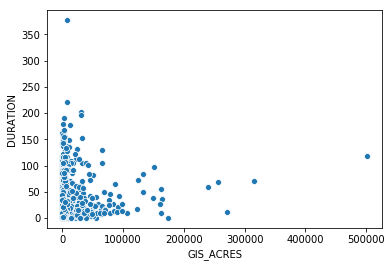

In [54]:
# My solution
# filter to only plausible duration
df = df[df.DURATION < 3000]
df = df[df.DURATION >= 0]
sns.scatterplot(df.GIS_ACRES, df.DURATION)

### Solution #4

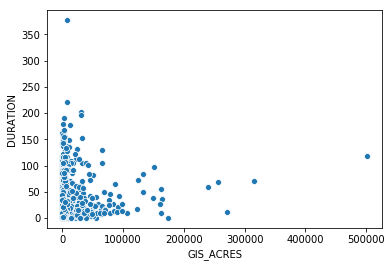

In [16]:
df = df[df.DURATION < 3000]
sns.scatterplot(df.GIS_ACRES, df.DURATION)

### Not much correlation between duration and size

We might expect some sort of correlation between duration and size, i.e., that bigger fires should probably tend to last longer.  There does not appear to be much correlation in this historical data, however.  Replotting the data, but coloring for which AGENCY is responsible for dealing with the fire, does suggest that some of this lack of correlation may be due to different management practices or suppression policies used by different agencies.

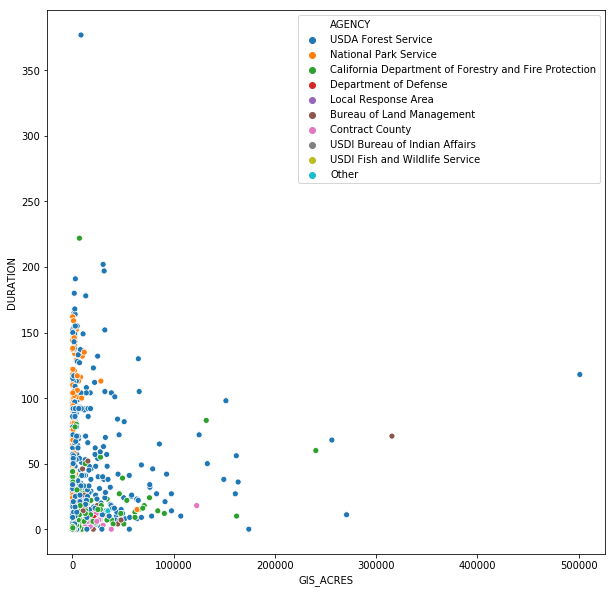

In [57]:
plt.figure(figsize=(10,10))
sns.scatterplot(data=df, x='GIS_ACRES', y='DURATION', hue='AGENCY')

### Assignment #5

### Distribution of fire sizes

1. Plot a histogram of the distribution of fire sizes (GIS_ACRES) over the entire dataset.

Hint: Use the <code>plt.hist</code> function, and specify <code>bins=1000</code> instead of the default 10.  And since fire sizes vary over a wide range, follow your hist plot with a call to <code>plt.loglog()</code> to make both axes logarithmic.

2. Plot a histogram of the distribution of fire durations (DURATION) over the entire dataset (although specify only 100 bins for this plot).



In [62]:
plt.hist?

Text(0, 0.5, 'f(DURATION')

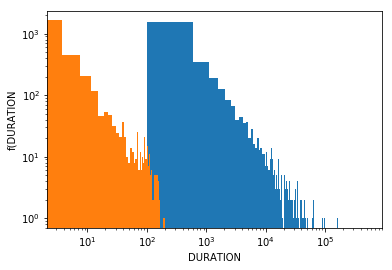

In [79]:
# My solution

plt.hist(df.GIS_ACRES, bins=1000)
plt.loglog()
plt.xlabel('GIS_ACRES'); plt.ylabel('f(GIS_ACRES')

plt.hist(df.DURATION, bins=100)
plt.loglog()
plt.xlabel('DURATION'); plt.ylabel('f(DURATION')

### Solution #5

Text(0, 0.5, 'P(DURATION)')

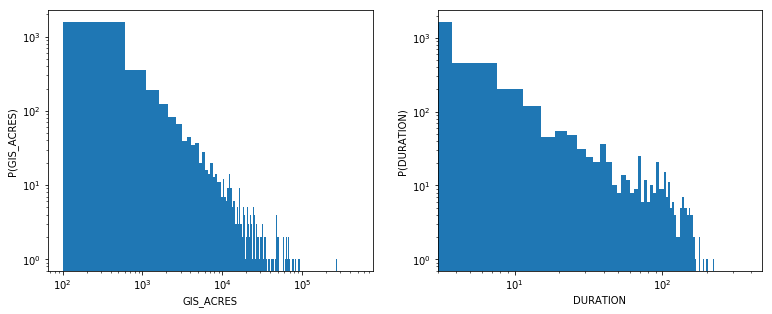

In [72]:
plt.figure(figsize=[12.8,4.8])
plt.subplot(1,2,1)
plt.hist(df.GIS_ACRES, bins=1000)
plt.loglog()
plt.xlabel('GIS_ACRES'); plt.ylabel('P(GIS_ACRES)')
plt.subplot(1,2,2)
plt.hist(df.DURATION, bins=100)
plt.loglog()
plt.xlabel('DURATION'); plt.ylabel('P(DURATION)')

### An aside on power laws, heavy tails, and "crackling noise"

![](powerlaws.jpg)

![](earthquakes.jpg)

### Assignment #6

#### Are California wildfires getting worse over time?

Make a plot of the total number of GIS_ACRES burned per year over the entire dataset.

Hint: pandas dataframes provide nice functionality for "grouping" data by some criterion.  The following code will group the wildfire data by year, and sum up all the columns within each group.  Augment this call to make a plot of total GIS_ACRES vs. YEAR.

<code>df.groupby('YEAR').sum().reset_index()</code>

In [80]:
#
df.groupby('YEAR').sum().reset_index()

,YEAR,REPORT_AC,GIS_ACRES,DURATION
0,1921.0,1.600000e+03,1.824899e+03,12.0
1,1922.0,1.200000e+03,1.652521e+03,10.0
2,1925.0,0.000000e+00,2.587852e+03,0.0
3,1926.0,8.650000e+04,3.523877e+04,15.0
4,1928.0,1.550000e+04,2.199788e+04,9.0
5,1930.0,2.250000e+03,1.206697e+03,1.0
6,1931.0,1.547600e+04,1.544759e+04,1.0
7,1933.0,9.000000e+03,4.872241e+02,2.0
8,1934.0,1.640000e+03,2.368925e+03,14.0
9,1935.0,1.642314e+02,1.642539e+02,0.0


### Solution #6 

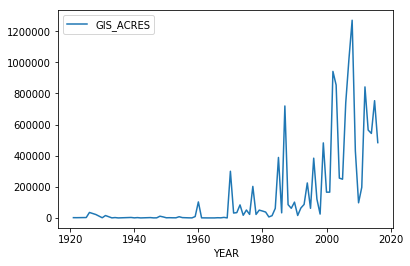

In [81]:
df.groupby('YEAR').sum().reset_index().plot('YEAR', 'GIS_ACRES')
#bigger fire over the year or less report back then?